In [1]:
import seaborn as sns
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

## #1

In [2]:
N = 25
sample = stats.expon.rvs(size=N)
sample.sort()

In [3]:
#a)
print()
samplemodes = []
for k in sample: 
    if (sample.tolist().count(k) == stats.mode(sample)[1][0] and samplemodes.count(k) == 0) : samplemodes.append(k)
print('Моды: ', np.around((samplemodes), decimals=2))
print('Медиана: ', "%.3f" % np.median(sample))
print('Размах: ', "%.3f" % np.ptp(sample))
print('Коэфф. ассиметрии: ', "%.3f" % stats.skew(sample))
print()


Моды:  [0.01 0.04 0.04 0.1  0.13 0.16 0.22 0.26 0.35 0.36 0.55 0.62 0.89 0.92
 0.92 1.05 1.08 1.25 1.41 1.7  1.93 2.01 2.21 2.54 2.78]
Медиана:  0.892
Размах:  2.773
Коэфф. ассиметрии:  0.715



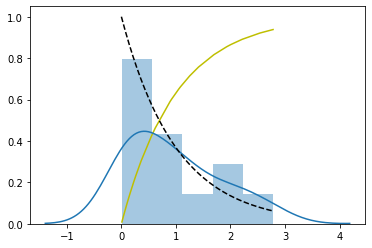

In [4]:
#b), c)
x = np.linspace(0., np.ptp(sample), 40)
y = np.exp(-x)

norm_cdf = stats.expon.cdf(sample) #эмпирическая функция распределения
sns.lineplot(sample, norm_cdf, color='y')

sns.distplot(sample, bins=1+int(np.log2(N)))

plt.plot(x, y, color='k', linestyle='--')

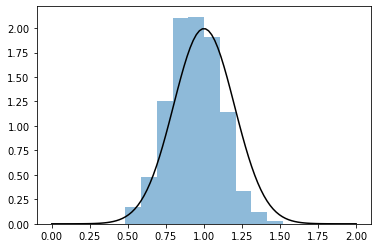

In [6]:
#d)
M = 1000
subsamples = np.zeros((M, N))
means = np.zeros((M))

for i in range(M):
    for j in range(N):
        subsamples[i, j] = np.random.choice(sample)
    means[i] = np.mean(subsamples[i])

fig, ax = plt.subplots(1, 1)
ax.hist(means, density=True, histtype='stepfilled', alpha=0.5)

x = np.linspace(0., 2., 100)
plt.plot(x,stats.norm.pdf(x, 1, 1/N**(1/2)), color='k')
plt.show()

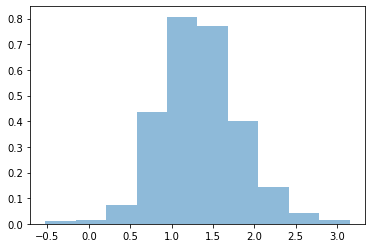

In [65]:
#e)
M = 1000
subsamples = np.zeros((M, N))
skews = np.zeros((M))

for i in range(M):
    for j in range(N):
        subsamples[i, j] = np.random.choice(sample)
    skews[i] = stats.skew(subsamples[i])
    
fig, ax = plt.subplots(1, 1)
ax.hist(skews, density=True, histtype='stepfilled', alpha=0.5)
plt.show()

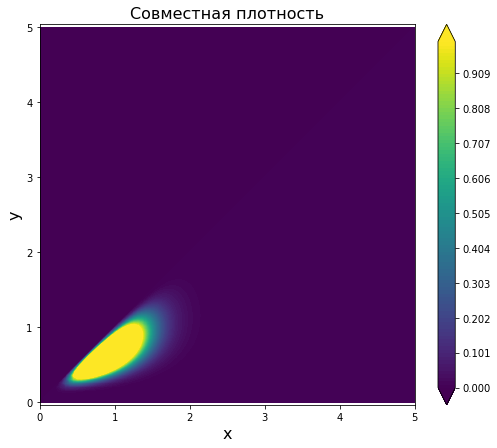

In [66]:
#f) jointplot
N = 100
n = 20
i = 10
j = 13
x = np.linspace(0.0, 5.0, N)
y = np.linspace(0.0, 5.0, N)
X, Y = np.meshgrid(x, y)

jointplot = np.zeros_like(Y)
for a in range(len(x)):
    for b in range(len(y)):
        if x[a] < y[b]:
            jointplot[a, b] = np.math.factorial(n)/(np.math.factorial(i-1)*np.math.factorial(j-i-1)*np.math.factorial(n-j))*(1-np.exp(-x[a]))**(i-1)*\
                    (np.exp(-x[a])-np.exp(-y[b]))**(j-i-1)*(np.exp(-y[b]))**(n-j)*\
                    np.exp(-x[a])*np.exp(-y[b])
        else: 
            jointplot[a, b] = 0.

width = 7
plt.figure(figsize=(width*1.20, width))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title('Совместная плотность', fontsize=16)
contf = plt.contourf(X, Y, jointplot,
                        levels=np.linspace(0.0, 1.0, 100),
                        extend='both')
plt.axis('equal')
plt.colorbar()

## #2

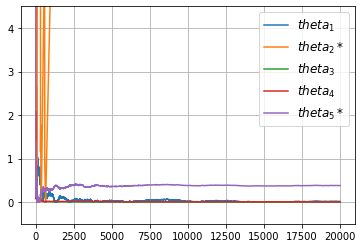

In [14]:
N = 20000
theta = 10
sample = np.zeros((N))

eval_theta = np.zeros((5, N))

sample = np.random.uniform(size=N) * theta

for n in range(1, N + 1):
    sample_n = sample[0:n].copy()
    
    eval_theta[0, n-1] = 2*np.mean(sample_n)
    eval_theta[1, n-1] = np.amin(sample_n)*(n+1)
    eval_theta[2, n-1] = np.amax(sample_n)*(n+1)/n
    eval_theta[3, n-1] = np.amin(sample_n) + np.amax(sample_n)
    
    if n==1:
        eval_theta[4, n-1] = sample[0]
    else:
        eval_theta[4, n-1] = sample[0] + (sum(sample_n[1:]))/(n-1)
    
x = list(range(n))
[m + 1 for m in x]

fig,ax = plt.subplots()
ax.set_ylim(-0.5, 4.5)

ax.plot(x, np.abs(eval_theta[0] - theta), label='$theta_1$')
ax.plot(x, np.abs(eval_theta[1] - theta), label='$theta_2*$')
ax.plot(x, np.abs(eval_theta[2] - theta), label='$theta_3$')
ax.plot(x, np.abs(eval_theta[3] - theta), label='$theta_4$')
ax.plot(x, np.abs(eval_theta[4] - theta), label='$theta_5*$')

plt.grid()

legend = ax.legend(loc='upper right', fontsize=12)
plt.show()

## #4

In [15]:
N=100
theta = 30
sample = stats.uniform.rvs(size=N)*theta

In [16]:
#d)
print()
m = sample.max()
al1 = np.mean(sample)
al2 = stats.moment(sample, moment=2)*N/(N-1)

print(' [', "%.3f" % (m/((1+0.95)/2)**(1/N)), \
      ";", "%.3f" % (m/((1-0.95)/2)**(1/N)), '] - точный')
print(' [', "%.3f" % (2*(al1 - 1.96*((-al2+al1**2)/N)**(1/2))), \
      ";", "%.3f" % (2*(al1 + 1.96*((-al2+al1**2)/N)**(1/2))), \
      '] - ассимптотический')
print()


 [ 29.725 ; 30.834 ] - точный
 [ 24.542 ; 33.807 ] - ассимптотический



In [17]:
#e)
print()
M = 1000
subsamples = np.zeros((M, N))
theta1 = np.zeros((M))
theta2 = np.zeros((M))

for i in range(M):
    for j in range(N):
        subsamples[i, j] = np.random.choice(sample)
    theta1[i] = 2*np.mean(subsamples[i])
    theta2[i] = subsamples[i].max()
    
ttheta1 = 2*al1
ttheta2 = sample.max()

theta1.sort()
theta2.sort()

print(' [', "%.3f" % theta1[24] , ";", "%.3f" % theta1[974], \
      '] - точный')
print(' [', "%.3f" % theta2[24] , ";", "%.3f" % theta2[974], \
      '] - ассимптотический')


 [ 25.950 ; 32.364 ] - точный
 [ 28.983 ; 29.718 ] - ассимптотический


## #5

In [25]:
N = 100
theta = 5
sample = stats.pareto(theta).rvs(size=N)

In [26]:
#e)
print()
meanlog = np.log(sample).sum()/N
theta1 = 1 + 1/(meanlog)
print('тета =', "%.3f" % theta1,'медиана =', "%.3f" % np.median(sample))
qtl1 = stats.gamma.ppf((1 - 0.95)/2, N, scale=1)
qtl2 = stats.gamma.ppf((1 + 0.95)/2, N, scale=1)
print()

u = 1.96*np.log(2)*meanlog/N**(1/2)
print(' [', "%.3f" % ((-u+1)*2**meanlog), ";", "%.3f" % ((u+1)*2**meanlog),\
      '] - ассимпт. для медианы')
print(' [', "%.3f" % (qtl1/meanlog/N + 1), ";", \
      "%.3f" % (qtl2/meanlog/N + 1), '] - точный')
print(' [', "%.3f" % (-1.96*1/meanlog/N**(1/2)+theta1), \
      ";", "%.3f" % (1.96*1/meanlog/N**(1/2)+theta1), \
      '] - ассимптотический')
print()


тета = 5.240 медиана = 1.193

 [ 1.140 ; 1.215 ] - ассимпт. для медианы
 [ 4.450 ; 6.111 ] - точный
 [ 4.409 ; 6.072 ] - ассимптотический



In [27]:
#f)
print()
M = 1000
subsamples = np.zeros((M, N))
theta1 = np.zeros((M))

for i in range(M):
    for j in range(N):
        subsamples[i, j] = np.random.choice(sample)
    theta1[i] = 1 + N/np.log(subsamples[i]).sum()

theta1.sort()

print(' [', "%.3f" % theta1[24] , ";", "%.3f" % theta1[974], \
      '] - бутстраповский')


 [ 4.417 ; 6.319 ] - бутстраповский


## #9

In [33]:
import statsmodels.api as sm
N = 100
freq = [5, 8, 6, 12, 14, 18, 11, 6, 13, 7]

In [34]:
#c)
print()
def me(x, k):
    m_k = 0
    for i in range(len(x)):
        m_k += (i**k)*x[i]/sum(x)
    return m_k
    
theta1 = me(freq, 1)
print("theta1 =", "%.3f" % theta1)

theta2 = (me(freq, 2) - theta1**2)**(1/2)
print("theta2 =", "%.3f" % theta2)
print()


theta1 = 4.770
theta2 = 2.505



In [43]:
def sup(z, mz_1, mz_2):
    l = len(freq)
    w = np.zeros((l))
    
    ecdf = sm.distributions.ECDF(z)
    u = ecdf(np.array(range(l)))
    v = stats.norm.cdf(np.array(range(l)), mz_1, mz_2)
    
    w[0] = np.max((v[0], np.abs(v[0] - u[0])))
    
    for i in range(1, len(freq)):
        w[i] = abs(max([v[i]-u[i], v[i]-u[i-1]], key=abs))
    return np.max(w)

M = 10000

D = np.zeros(M)
s = np.zeros([M,N])
s1 = np.zeros([M,len(freq)])

for i in range(M):
    for j in range(N):
        a = np.random.uniform()
        k = int(np.round(stats.norm.ppf(a, theta1, theta2)))
        if (k <= -1):
            s[i][j] = 0
            s1[i][0] += 1
        elif (k >= 10):
            s[i][j] = 9
            s1[i][9] += 1
        else:
            s[i][j] = k
            s1[i][k] += 1
            
    mD_1 = me(s1[i], 1)
    mD_2 = (me(s1[i], 2) - mD_1**2)**(1/2)
    
    D[i] = sup(s[i], mD_1, mD_2)   
D = np.sort(D)   
r1 = []

for i in range(len(freq)):
    for j in range(freq[i]):
        r1.append(i)
        
d = sup(r1, theta1, theta2)
p_value = 0

for i in range(M):
    if (D[i] > d):
        p_value = 1 - i/M
        break
        
print("\n p_value =", p_value, "-> ...")
print()


 p_value = 0.8374 -> ...



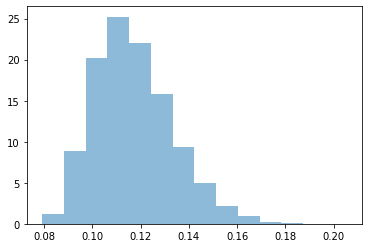

In [59]:
n, bins, patches = plt.hist(D, 1 + int(np.floor(np.log2(M))), \
                            density = 1, alpha = 0.5)
plt.show()